# Problem Statement

Imagine you have a dataset where you have predicted loan Eligibility using any
4 different classification algorithms. 

Now you have to build a model which can
predict loan Eligibility and you need to find the accuracy of the model and 

built-in
docker and use some library to display that in frontend.

## Dataset

Link : https://www.kaggle.com/datasets/ninzaami/loan-predication/download?datasetVersionNumber=1

# Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
%matplotlib inline
import seaborn as sns


# Data Ingestion

In [2]:
file_path = "loan_eligibility.csv"

df = pd.read_csv(file_path)

In [3]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


# EDA & FE

## Basic info about Dataset

In [4]:
print(f"No of Rows = {df.shape[0]}\nNo of columns = {df.shape[1]}")

No of Rows = 614
No of columns = 13


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


**Observations:**

1. The data set contain 12 Independent features and one target feature i.e. Loan_Status.

2. Out of 12 independent features 7 are categorical and 5 are Numerical.

3. Loan_ID is just a label and unique for each row. It has very little relationship with the loan status. We should drop it.

4. Remaining 6 categorical features need to be encoded into Numerical variables.

## Numerical and Categorical Features

In [33]:
num_col = df.select_dtypes(['int64', 'float64']).columns.to_list()
cat_col = df.select_dtypes('object').columns.to_list()

print(f"Numeric columns : {num_col}\nCategorical columns : {cat_col}")

Numeric columns : ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term', 'Credit_History']
Categorical columns : ['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area', 'Loan_Status']


## Data Cleaning

### Handle missing values

In [27]:
# Check for missing values and calculate the percentage of missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Columns with missing values and their percentages
columns_with_missing_values = missing_percentage[missing_percentage > 0]

columns_with_missing_values.sort_values(ascending=False).round(2)

Credit_History      8.14
Self_Employed       5.21
LoanAmount          3.58
Dependents          2.44
Loan_Amount_Term    2.28
Gender              2.12
Married             0.49
dtype: float64

**Observations:**

- We can see in the above list that following features have some missing values:

        - Credit_History       8.14

        - Self_Employed        5.21

        - LoanAmount           3.58

        - Dependents           2.44

        - Loan_Amount_Term     2.28

        - Gender               2.12
        
        - Married              0.49

- As the dataset have only 600+ observations, we can't drop all the missing observations. Instead we need to find some satistical approximations for each observation if possible.

- For Categorical features we will fill the missing values with mode of the respective column.

- For Numerical Features we will fill the missing values with mean or median values.

In [30]:
# Handling missing values

# Credit_History: Fill with the mode (most frequent value)
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

# Self_Employed: Fill with the mode (most frequent value)
df['Self_Employed'].fillna(df['Self_Employed'].mode()[0], inplace=True)

# LoanAmount: Fill with the mean
df['LoanAmount'].fillna(df['LoanAmount'].mean(), inplace=True)

# Dependents: Fill with the mode (most frequent value)
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace=True)

# Loan_Amount_Term: Fill with the median
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].median(), inplace=True)

# Gender: Fill with the mode (most frequent value)
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

# Married: Fill with the mode (most frequent value)
df['Married'].fillna(df['Married'].mode()[0], inplace=True)



In [31]:
# Verify if there are no more missing values
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

**Comment:**

Successfully handled all the missing values without removing them.

### Remove duplicates

In [32]:
df.duplicated().sum()

0

**No Duplicated rows found.**

### Deal with outliers

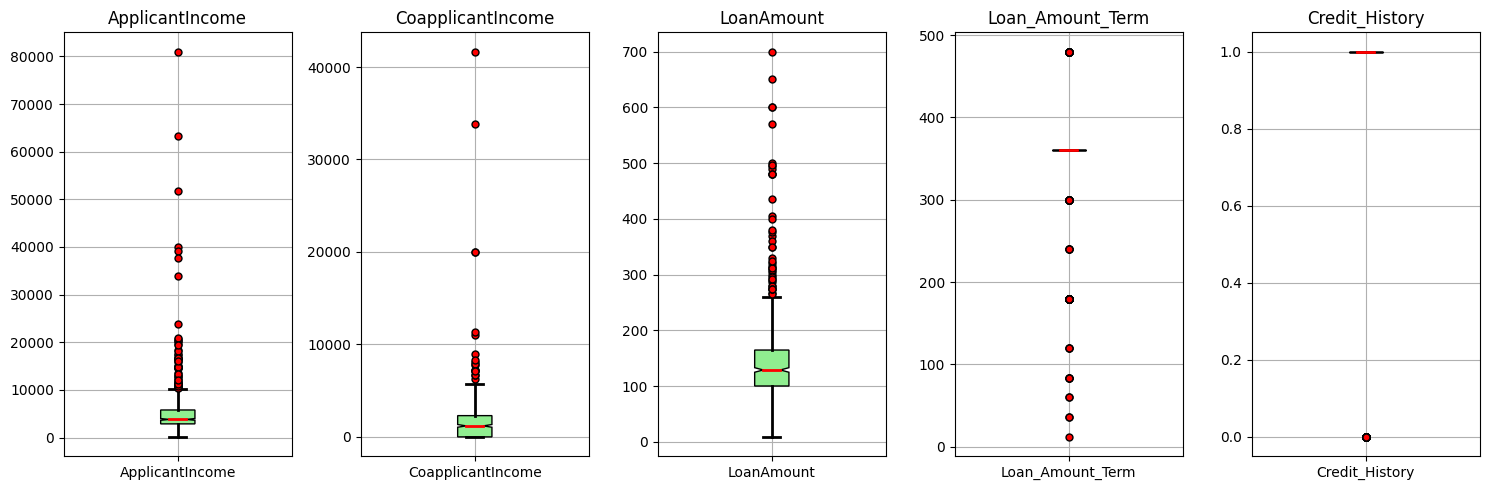

In [39]:
# Create a subplot grid for the boxplots
fig, axes = plt.subplots(nrows=1, ncols=len(num_col), figsize=(15, 5))

# Iterate over the numerical columns and create boxplots in each subplot
for i, column in enumerate(num_col):
    ax = axes[i]  # Select the current subplot
    # Create the boxplot for the current column
    boxplot = df.boxplot(column=column, ax=ax, patch_artist=True, notch=True,
                         whiskerprops=dict(linewidth=2),
                         capprops=dict(linewidth=2),
                         medianprops=dict(linewidth=2, color='red'),
                         boxprops=dict(facecolor='lightgreen', color='black'),
                         flierprops=dict(marker='o', markersize=5, markerfacecolor='red'))
    
    ax.set_title(column)  # Set the title of the subplot
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

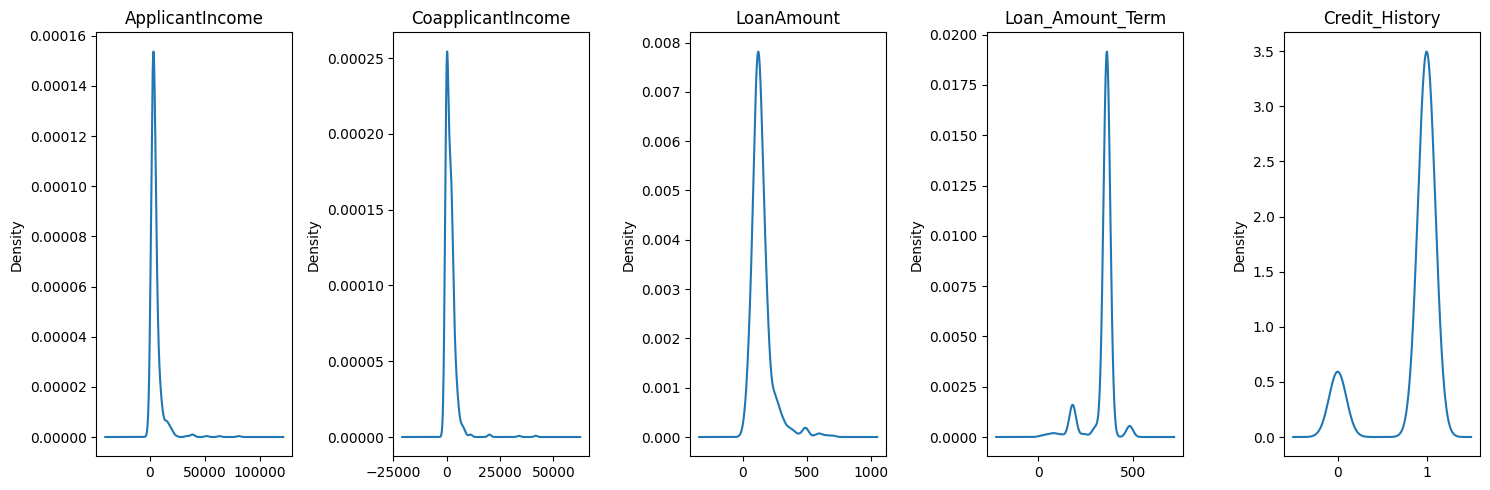

In [41]:
# Create a subplot grid for the kdeplots
fig, axes = plt.subplots(nrows=1, ncols=len(num_col), figsize=(15, 5))

# Iterate over the numerical columns and create kdeplots in each subplot
for i, column in enumerate(num_col):
    ax = axes[i]  # Select the current subplot
    # Create the kdeplot for the current column
    df[column].plot(kind='kde', ax=ax)
    
    ax.set_title(column)  # Set the title of the subplot
    
# Adjust the spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

### Resolve inconsistencies

In [ ]:
###

# Feature Selection

# Feature Seperation

# Train-Test Split

# Model Initiation

# Model Training

# Model Performance and Selection